## Load in Packages

In [1]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
    library(ggpubr)
    library(cowplot)
    library(viridis)
    library(grid)
    library(ragg) # For rasterized output
    library(gridExtra)
    library(Cairo)
    library(png)
})

## Load in R Scripts

In [2]:
script_files <- list.files("projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/R_scripts", 
                           pattern = "\\.[rR]$", full.names = TRUE)

lapply(script_files, source)

list()

## Data Locations

In [3]:
##### Load in Seurat Objects for post QC analyses #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

# Set the working directory
setwd(io$main)

##### Load in the refined annotations and final metadata #####
io$FINAL_REFINED_ANNOTATIONS = file.path(io$main, 
                               "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/1B_FINAL_REFINED_ANNOTATIONS_REVISIONS_POST_REVISION.Rds")

# load in the final refined_annotations
FINAL_REFINED_ANNOTATIONS = readRDS(io$FINAL_REFINED_ANNOTATIONS)

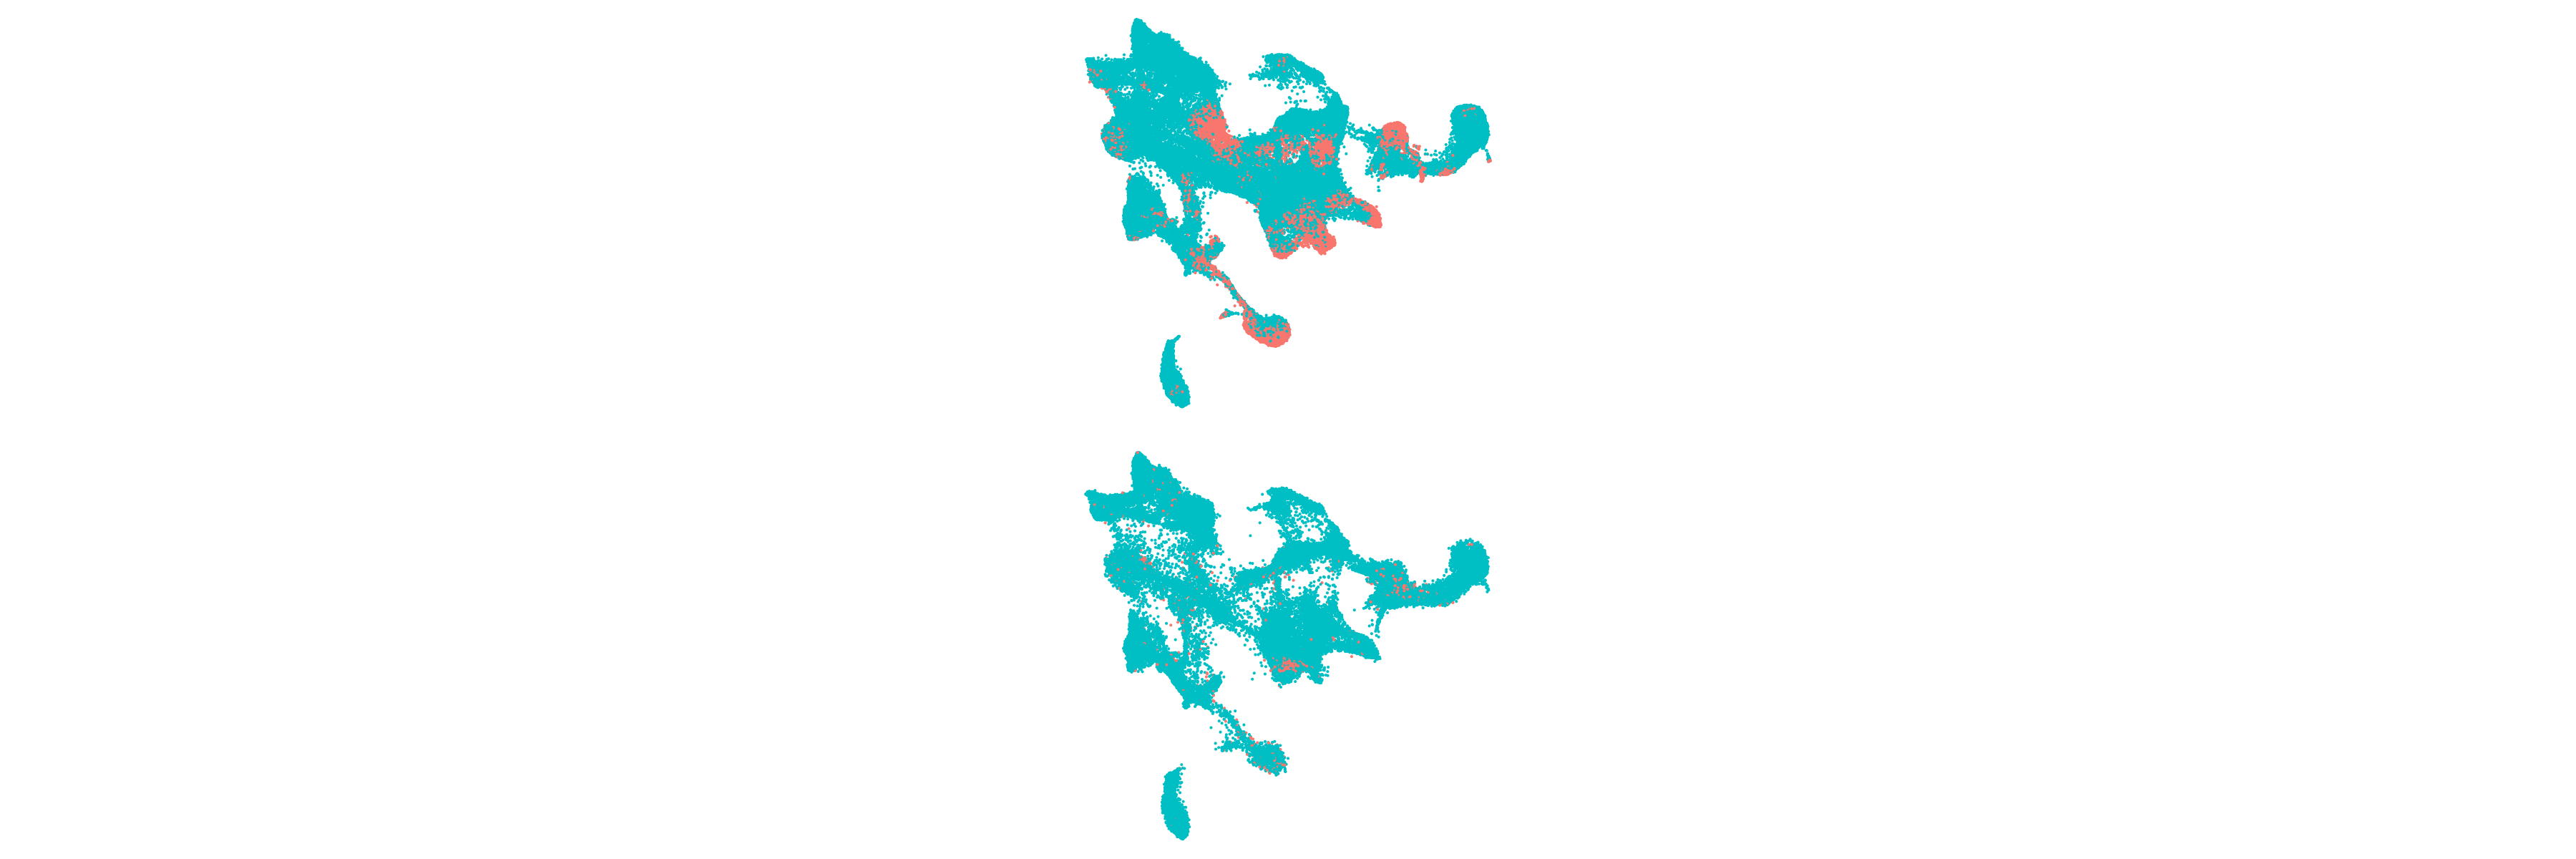

In [4]:
options(repr.plot.width=30, repr.plot.height=10)
df_to_plot <- subset(FINAL_REFINED_ANNOTATIONS)

# Create the scatter plot
p1 <- ggplot(df_to_plot, aes(x = UMAP_1, y = UMAP_2, color = joint_clusters_pass_QC)) +
  geom_point(size = 0.1) +
  #scale_color_manual(values = refined_annotation_colors) +
  facet_wrap(~dataset, ncol = 1) +
  labs(title = "UMAP Scatter Plot Colored by Cluster",
       x = "UMAP 1",
       y = "UMAP 2") +
ggtitle(NULL)+
theme_void() + 
    theme(
      legend.position = 'none',
      strip.text.x = element_blank(),  # Remove facet labels on x-axis
      strip.text.y = element_blank(),  # Remove facet labels on y-axis
      axis.title.y = element_blank()
    ) +  
    coord_fixed(ratio = 1)
p1

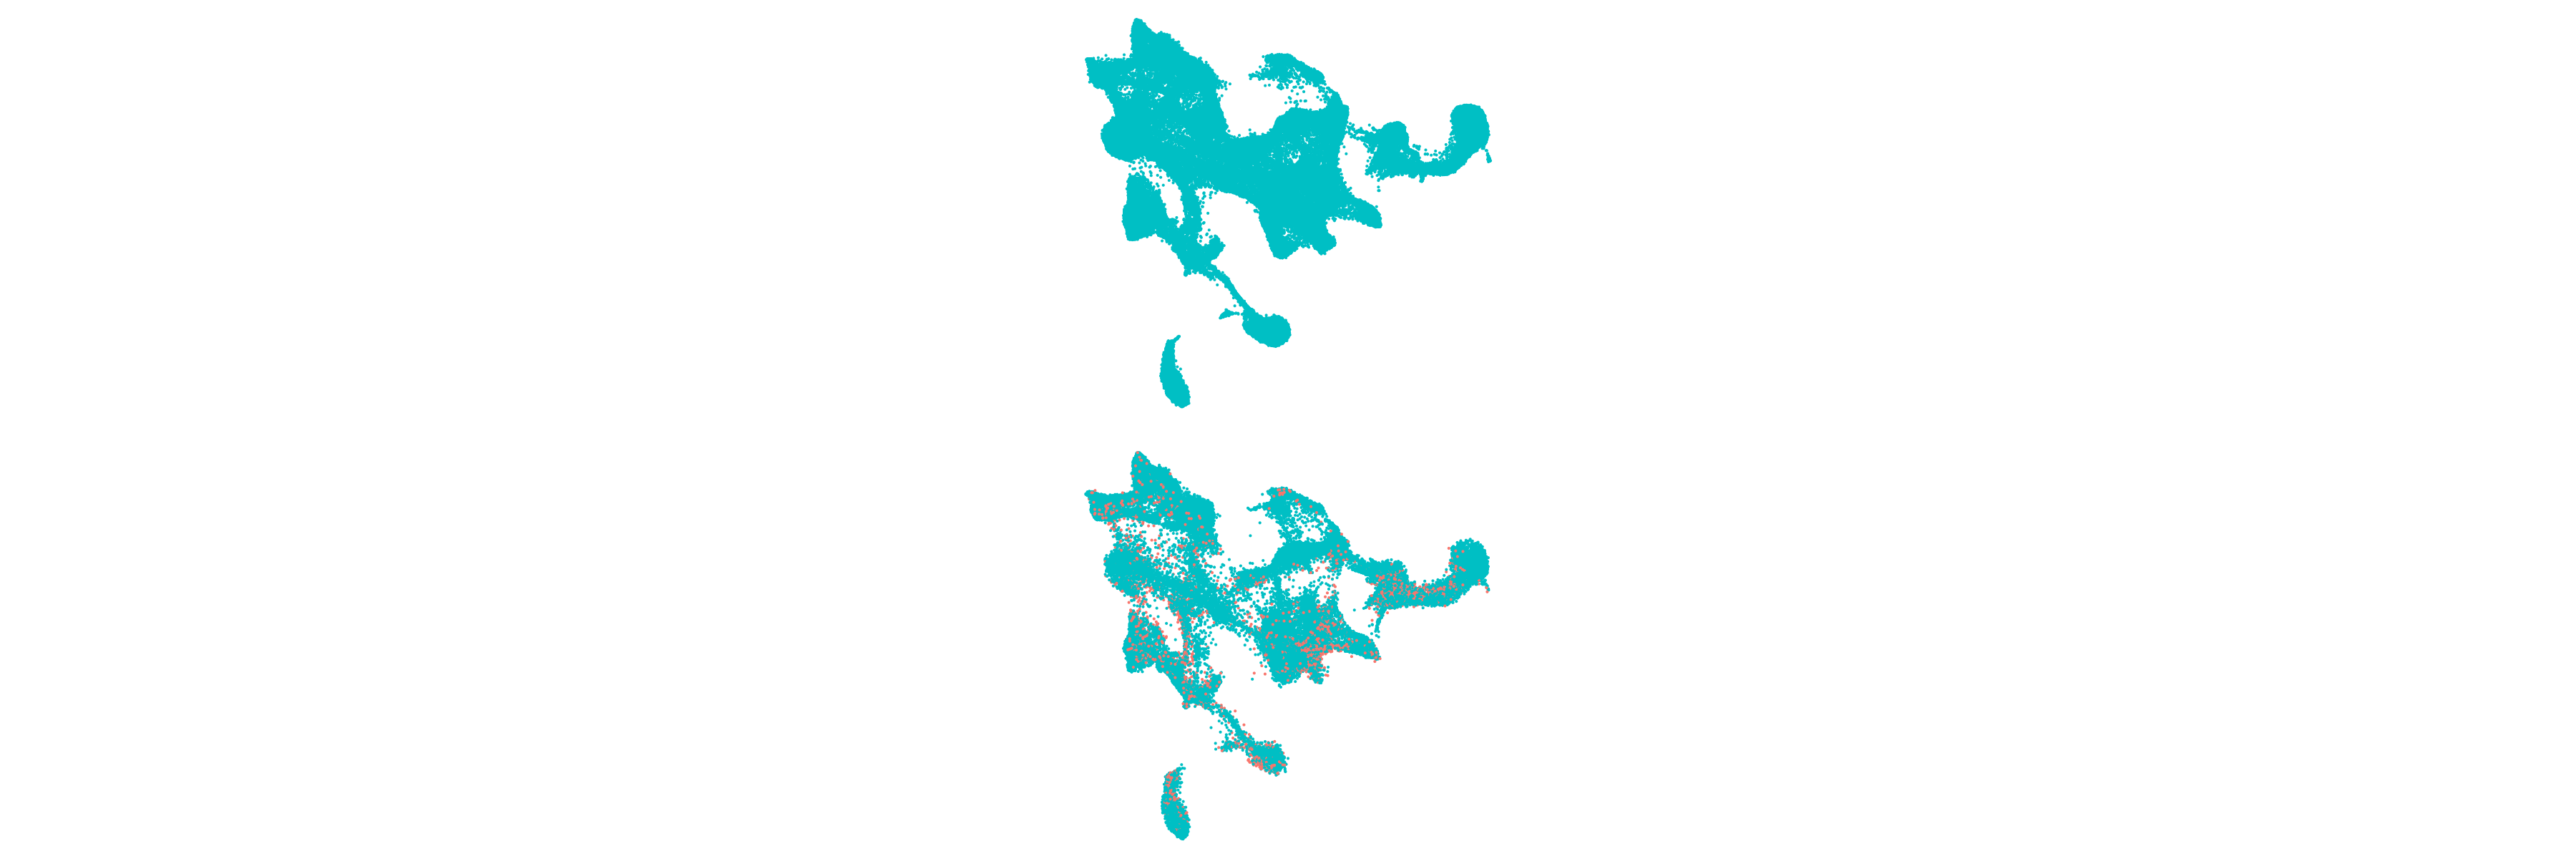

In [5]:
options(repr.plot.width=30, repr.plot.height=10)
df_to_plot <- subset(FINAL_REFINED_ANNOTATIONS)

# Create the scatter plot
p2 <- ggplot(df_to_plot, aes(x = UMAP_1, y = UMAP_2, color = stage_alignment_pass_QC)) +
  geom_point(size = 0.1) +
  #scale_color_manual(values = refined_annotation_colors) +
  facet_wrap(~dataset, ncol = 1) +
  labs(title = "UMAP Scatter Plot Colored by Cluster",
       x = "UMAP 1",
       y = "UMAP 2") +
ggtitle(NULL)+
theme_void() + 
    theme(
      legend.position = 'none',
      strip.text.x = element_blank(),  # Remove facet labels on x-axis
      strip.text.y = element_blank(),  # Remove facet labels on y-axis
      axis.title.y = element_blank()
    ) +  
    coord_fixed(ratio = 1)
p2

## Collision tables

In [6]:
script_files <- list.files("projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/R_scripts", 
                           pattern = "\\.[rR]$", full.names = TRUE)

lapply(script_files, source)

[[1]]
[[1]]$value
function (embedding, batchFactor, ...) 
{
    require(batchelor)
    embedding <- as.matrix(embedding)
    batchFactor_used = batchFactor[rownames(embedding)]
    out = reducedMNN(embedding, batch = batchFactor_used, ...)
    resub_corrected = out$corrected
    return(resub_corrected)
}

[[1]]$visible
[1] FALSE


[[2]]
[[2]]$value
 [1] "Anterior Primitive Streak"      "Parietal endoderm"             
 [3] "Gut tube"                       "ExE endoderm"                  
 [5] "Visceral endoderm"              "ExE ectoderm distal"           
 [7] "ExE ectoderm proximal"          "Epiblast"                      
 [9] "Primitive Streak"               "Nascent mesoderm"              
[11] "PGC"                            "ExE mesoderm"                  
[13] "Haematoendothelial progenitors" "Blood progenitors"             
[15] "ExE mesoderm and Anterior LPM"  "Non-neural ectoderm"           
[17] "Ectoderm"                       "Intermediate mesoderm"         
[19] "Caudal epiblast"                "Rostral ectoderm"              

[[2]]$visible
[1] FALSE


[[3]]
[[3]]$value
 [1] "Epiblast"                          "Rostral Ectoderm"                 
 [3] "Caudal Epiblast"                   "Primitive Streak"                 
 [5] "Mesodermal Wings"                  "ExE Mesoderm"                     
 [7] "Haematoendothelial Progenitors #1" "Haematoendothelial Progenitors #2"
 [9] "Axial Mesendoderm"                 "Definitive Endoderm"              
[11] "ExE Endoderm"                      "Visceral Endoderm #1"             
[13] "Visceral Endoderm #2"              "ExE Ectoderm Proximal #1"         
[15] "ExE Ectoderm Proximal #2"          "ExE Ectoderm Distal #1"           
[17] "ExE Ectoderm Distal #2"            "low quality"                      

[[3]]$visible
[1] FALSE


[[4]]
[[4]]$value
                      low quality            ExE Ectoderm Distal #1 
                        "#E0E0E0"                         "#8A2BE2" 
           ExE Ectoderm Distal #2                          Epiblast 
                        "#7B68EE"                         "#8B4513" 
                 Rostral Ectoderm                   Caudal Epiblast 
                        "#D2691E"                         "#8B0000" 
             Visceral Endoderm #1              Visceral Endoderm #2 
                        "#6B8E23"                         "#32CD32" 
                     ExE Endoderm                 Axial Mesendoderm 
                        "#4169E1"                         "#ADD8E6" 
              Definitive Endoderm                  Primitive Streak 
                        "#000000"                         "#FFD700" 
                     ExE Mesoderm                  Mesodermal Wings 
                        "#FF8C00"                         "#FFA07A" 
Haematoendothelial Progenitors #1 Haematoendothelial Progenitors #2 
                        "#FF2400"                         "#B22222" 
         ExE Ectoderm Proximal #1          ExE Ectoderm Proximal #2 
                        "#FF1493"                         "#FF69B4" 

[[4]]$visible
[1] FALSE


[[5]]
[[5]]$value
[[5]]$value$`Anterior Primitive Streak`
[1] "Gsc"   "Foxa2"

[[5]]$value$`Parietal endoderm`
[1] "Sox7"   "Pdgfra"

[[5]]$value$`Gut tube`
[1] "Apela" "Foxa2"

[[5]]$value$`ExE endoderm`
[1] "Ttr"   "Apoa2"

[[5]]$value$`Visceral endoderm`
[1] "Spink1" "Emb"   

[[5]]$value$`ExE ectoderm distal`
[1] "Ascl2" "Gjb3" 

[[5]]$value$`ExE ectoderm proximal`
[1] "Elf5" "Perp"

[[5]]$value$Epiblast
[1] "Pou5f1" "Utf1"  

[[5]]$value$`Primitive Streak`
[1] "Nanog" "T"    

[[5]]$value$`Nascent mesoderm`
[1] "Lefty2" "Mixl1" 

[[5]]$value$PGC
[1] "Ifitm3" "Pou5f1"

[[5]]$value$`ExE mesoderm`
[1] "Bmp4"  "Foxf1"

[[5]]$value$`Haematoendothelial progenitors`
[1] "Etv2" "Kdr" 

[[5]]$value$`Blood progenitors`
[1] "Cited4" "Gata1" 

[[5]]$value$`ExE mesoderm and Anterior LPM`
[1] "Pmp22" "Foxf1"

[[5]]$value$`Non-neural ectoderm`
[1] "Msx2"   "Cxcl12"

[[5]]$value$Ectode

In [7]:
diagonalise = function(mat) {
  # reorder rows and columns so that it's closest to diagonal as possible
  newmat = mat
  mis = NULL
  while (sum(newmat)>0) {
    nonzeromin = min(newmat[newmat>0])
  bestind = which(newmat==nonzeromin,arr=TRUE)
  bestrow = bestind[1,1]
  bestcol = bestind[1,2]
  newmat = newmat[c(bestrow,setdiff(1:nrow(newmat),bestrow)),
                  c(bestcol,setdiff(1:ncol(newmat),bestcol))]
  mis = c(mis,sum(newmat[2:nrow(newmat),1],
      newmat[1,2:ncol(newmat)]))
  newmat[1,1] <- 0
  
  }
  
  matOrdered = mat[rownames(newmat),colnames(newmat)]
  return(matOrdered)
}

In [8]:
refined_annotation_colors <- Harland_colors

In [9]:
colnames(FINAL_REFINED_ANNOTATIONS)

[1] "cell_ID"                                             
 [2] "orig.ident"                                          
 [3] "nCount_RNA"                                          
 [4] "nFeature_RNA"                                        
 [5] "seqFISH_celltype"                                    
 [6] "extended_atlas_celltype"                             
 [7] "AP"                                                  
 [8] "DV"                                                  
 [9] "dataset"                                             
[10] "cluster"                                             
[11] "subcluster"                                          
[12] "cluster_subcluster"                                  
[13] "stage"                                               
[14] "anatomy"                                             
[15] "UMAP_1"                                              
[16] "UMAP_2"                                              
[17] "celltype_PijuanSala2019"                             
[18] "majority_seqFISH_celltype"                           
[19] "majority_seqFISH_celltype_proportion"                
[20] "majority_extended_atlas_celltype"                    
[21] "majority_extended_atlas_celltype_proportion"         
[22] "majority_celltype_PijuanSala2019_celltype"           
[23] "majority_celltype_PijuanSala2019_celltype_proportion"
[24] "stage_transfer"                                      
[25] "poor_stage_alignment"                                
[26] "proportion_seqFISH_cells_per_subcluster"             
[27] "joint_clusters_pass_QC"                              
[28] "stage_alignment_pass_QC"                             
[29] "passed_QC"                                           
[30] "refined_annotation"                                  
[31] "embryo"

In [10]:
FINAL_REFINED_ANNOTATIONS_scRNA <- subset(FINAL_REFINED_ANNOTATIONS, dataset == "scRNA" & joint_clusters_pass_QC == TRUE)
FINAL_REFINED_ANNOTATIONS_seqFISH <- subset(FINAL_REFINED_ANNOTATIONS, dataset == "scRNA" & joint_clusters_pass_QC == TRUE)

In [11]:
FINAL_REFINED_ANNOTATIONS_scRNA$extended_atlas_celltype <- as.character(FINAL_REFINED_ANNOTATIONS_scRNA$extended_atlas_celltype)
FINAL_REFINED_ANNOTATIONS_scRNA$refined_annotation <- as.character(FINAL_REFINED_ANNOTATIONS_scRNA$refined_annotation)

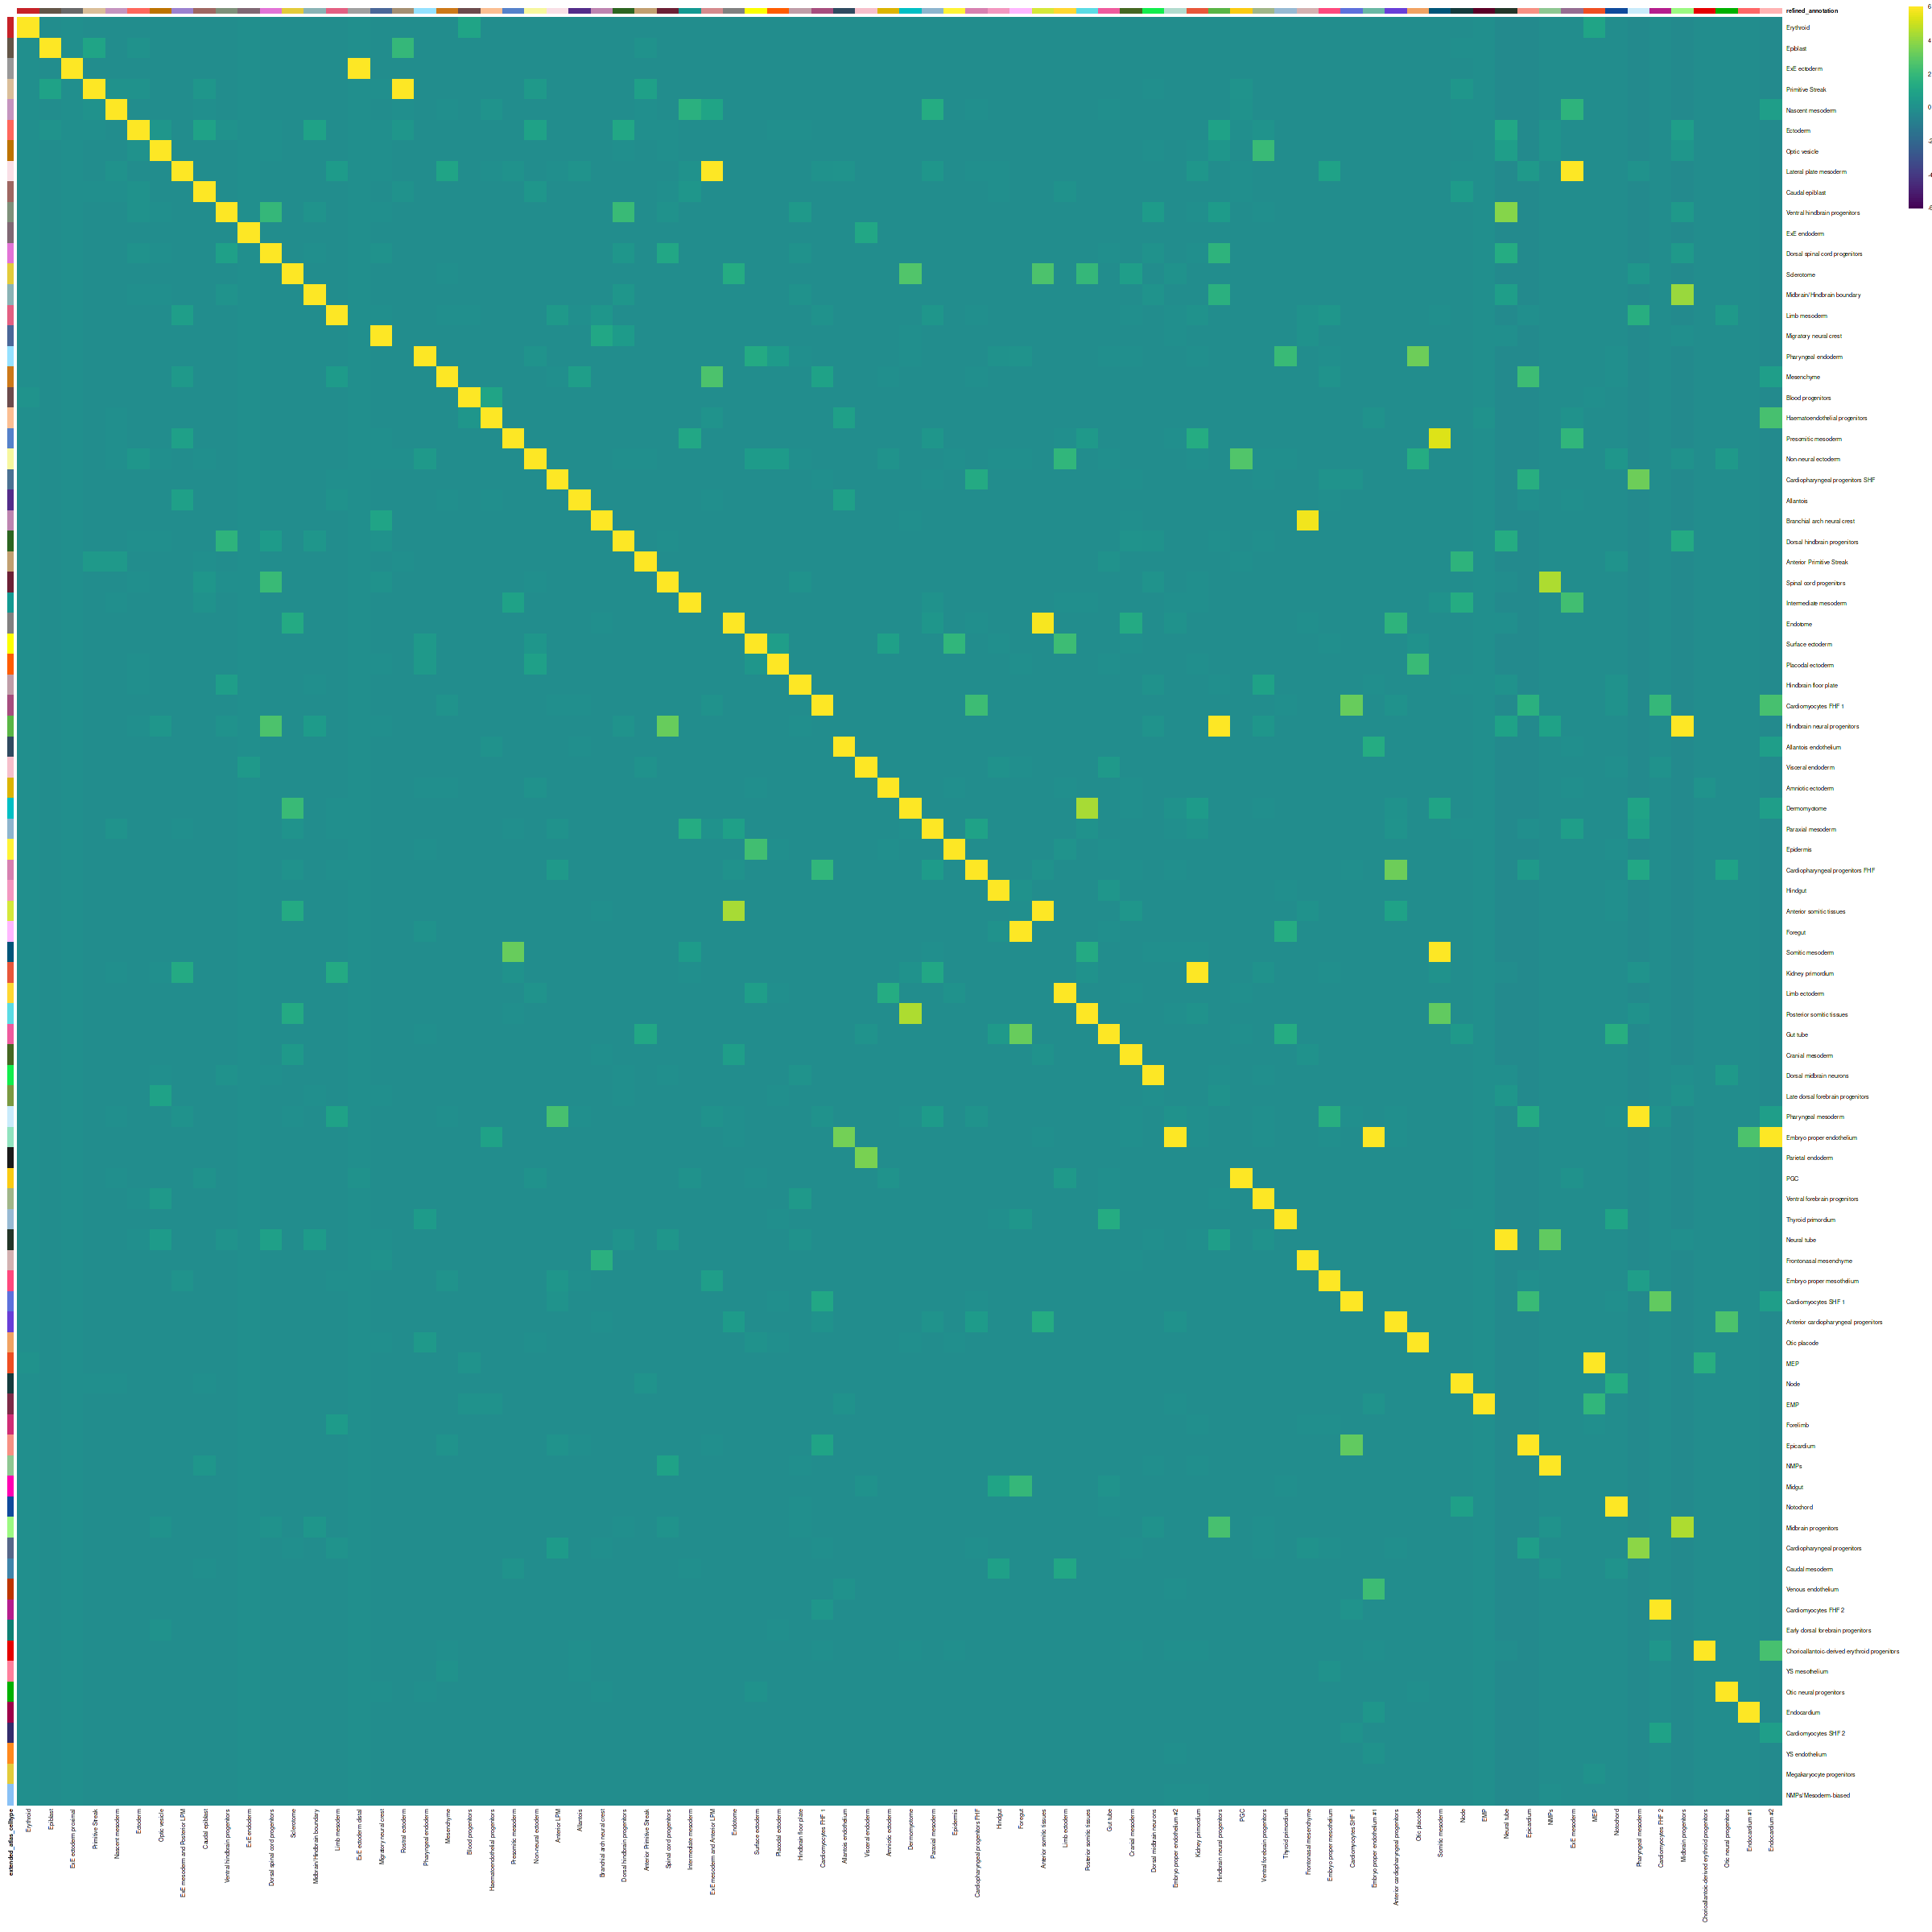

In [12]:
df <- FINAL_REFINED_ANNOTATIONS_scRNA
breaks <- seq(-6, 6, length.out = 101)

#cell_counts <- table(FINAL_REFINED_ANNOTATIONS_SS$refined_annotation_ordered, FINAL_REFINED_ANNOTATIONS_SS$stage_dataset)

my_colour = list(
    extended_atlas_celltype = Imaz_Rosshandler_colors,
    refined_annotation = refined_annotation_colors
    )

collistion_plot <- table(df$extended_atlas_celltype, df$refined_annotation)

row_annotations <- as.data.frame(colnames(collistion_plot))
colnames(row_annotations) <- "refined_annotation"
row.names(row_annotations) <- row_annotations$refined_annotation
                     
col_annotations <- as.data.frame(rownames(collistion_plot))
colnames(col_annotations) <- "extended_atlas_celltype"
row.names(col_annotations) <- col_annotations$extended_atlas_celltype

## scRNA collision table, original labels and noew refined annotations ##
options(repr.plot.width=20, repr.plot.height=20)
collistion_plot_scRNA <- pheatmap(diagonalise(collistion_plot),
        breaks = breaks,
        color = viridis(100), 
        border_color = NA,
        angle_col = 90,
        scale = "column", 
        treeheight_row = 0,
        treeheight_col = 0,
        cluster_rows = FALSE,
        cluster_cols = FALSE,
        annotation_col = row_annotations,
        annotation_row = col_annotations,
        annotation_colors = my_colour,
        fontsize = 4,
        legend = TRUE,
        annotation_legend = FALSE,
        xlab = "refined annotations",
        ylab = "Imaz-Rosshandler Cell Types")

#### Generating Combined Panels

In [13]:
#umaps
p3 <- collistion_plot_scRNA

png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/sfig_3/output/refined_annotation_collision_plot.pdf

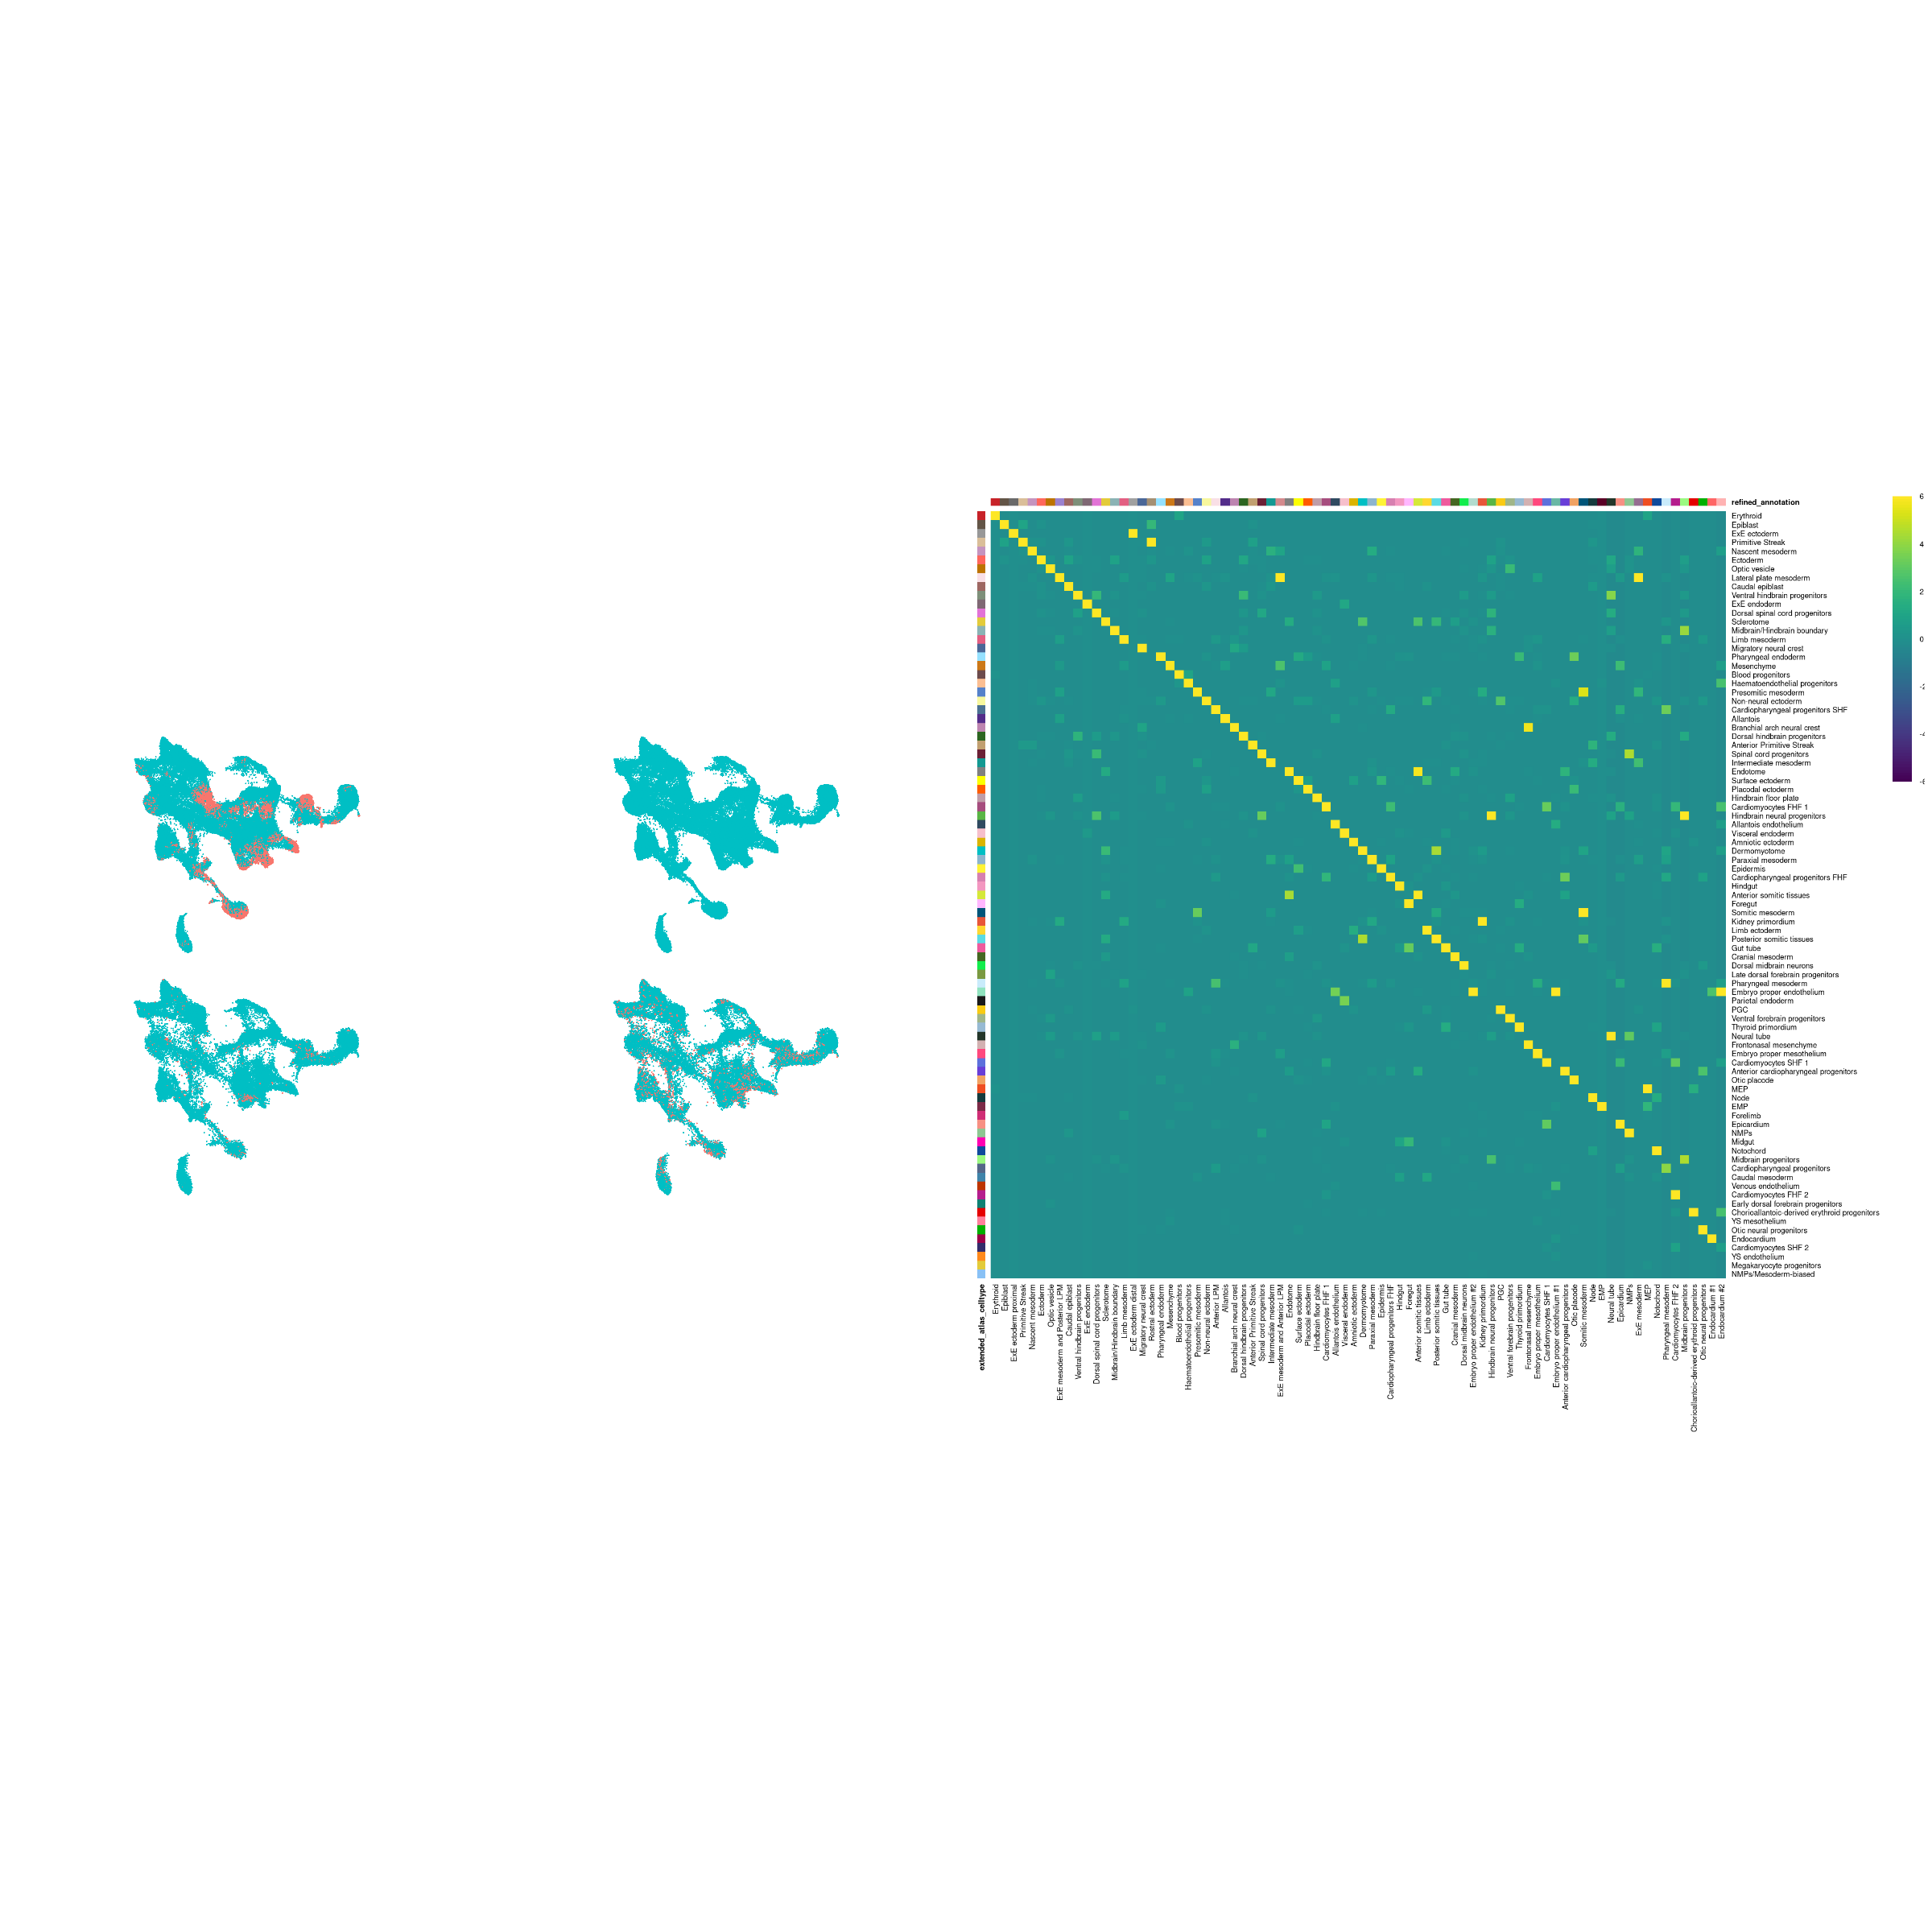

In [14]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 7, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()

# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3,
  ncol = 3, nrow = 1) +
  plot_layout(
    widths = c(1, 1, 2),
    heights = c(1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/sfig_3/output/refined_annotation_collision_plot.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = (200/4)*1/5)
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

## Refined annotation cell counts and summary statistics

In [15]:
FINAL_REFINED_ANNOTATIONS$embryo <- factor(FINAL_REFINED_ANNOTATIONS$embryo, levels = c("embryo_1", "embryo_2", "embryo_3", "embryo_4", "embryo_5", "embryo_6", "embryo_7", "scRNA"))

In [16]:
# Define the function
create_embryo_plot <- function(df, selected_annotations, stage_to_include, refined_annotation_colors) {
  
  # Filter the dataset based on the provided stage and selected annotations
  embryo_counts <- df %>%
    filter(dataset == "seqFISH", stage %in% stage_to_include, refined_annotation %in% selected_annotations, joint_clusters_pass_QC == TRUE) %>%
    group_by(embryo, refined_annotation) %>%
    summarise(count = n()) %>%
    ungroup()
  
  # Create the grouped bar chart
  plot <- ggplot(embryo_counts, aes(x = embryo, y = count, fill = refined_annotation)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = NULL,
         x = NULL,
         y = "Cell Counts",
         fill = "Refined Annotation") +
    theme_minimal() +
    scale_fill_manual(values = refined_annotation_colors) + 
    theme(
      legend.position = "none",
      text = element_text(family = "Arial", size = 14),  # Set font type to Arial and base size to 14
      axis.text.x = element_text(angle = 0, hjust = 0.5, size = 12),  # Adjust x-axis text size
      axis.text.y = element_text(size = 12),  # Adjust y-axis text size
      axis.title.x = element_text(size = 14),  # Adjust x-axis title size
      axis.title.y = element_text(size = 14),  # Adjust y-axis title size
      plot.title = element_text(size = 16, face = "bold"),  # Adjust title size and make it bold
      legend.title = element_text(size = 14),  # Adjust legend title size
      legend.text = element_text(size = 12),  # Adjust legend text size
      panel.grid.minor = element_blank(),  # Remove minor grid lines
      axis.line.y = element_line(),  # Ensure y-axis line is visible
      axis.line.x = element_line()  # Ensure x-axis line is visible
    )
  
  # Return the plot
  return(plot)
}


# Call the function to create the plot
cardiac_p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = LPM, stage_to_include = "E8.5", refined_annotation_colors)
somitic_p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = cranial_somitic, stage_to_include = "E8.5", refined_annotation_colors)
hematoendotehlial_p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = hematovascular, stage_to_include = "E8.5", refined_annotation_colors)
ectoderm_p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = surface_ectoderm, stage_to_include = "E8.5", refined_annotation_colors)
endoderm_p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = endoderm, stage_to_include = "E8.5", refined_annotation_colors)
neuraltube_p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = neural_tube, stage_to_include = "E8.5", refined_annotation_colors)

e6p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = early_gastrula, stage_to_include = "E6.5", refined_annotation_colors)
e7p <- create_embryo_plot(FINAL_REFINED_ANNOTATIONS, selected_annotations = early_gastrula, stage_to_include = "E7.5", refined_annotation_colors)

`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'embryo'. You can override using the
`.groups` argument.


#### Generating Combined Panels

In [17]:
p1 <- e6p
p2 <- e7p
p3 <- ectoderm_p
p4 <- neuraltube_p
p5 <- cardiac_p
p6 <- somitic_p
p7 <- hematoendotehlial_p
p8 <- endoderm_p

png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/sfig_3/output/seqFISH_cell_counts.pdf

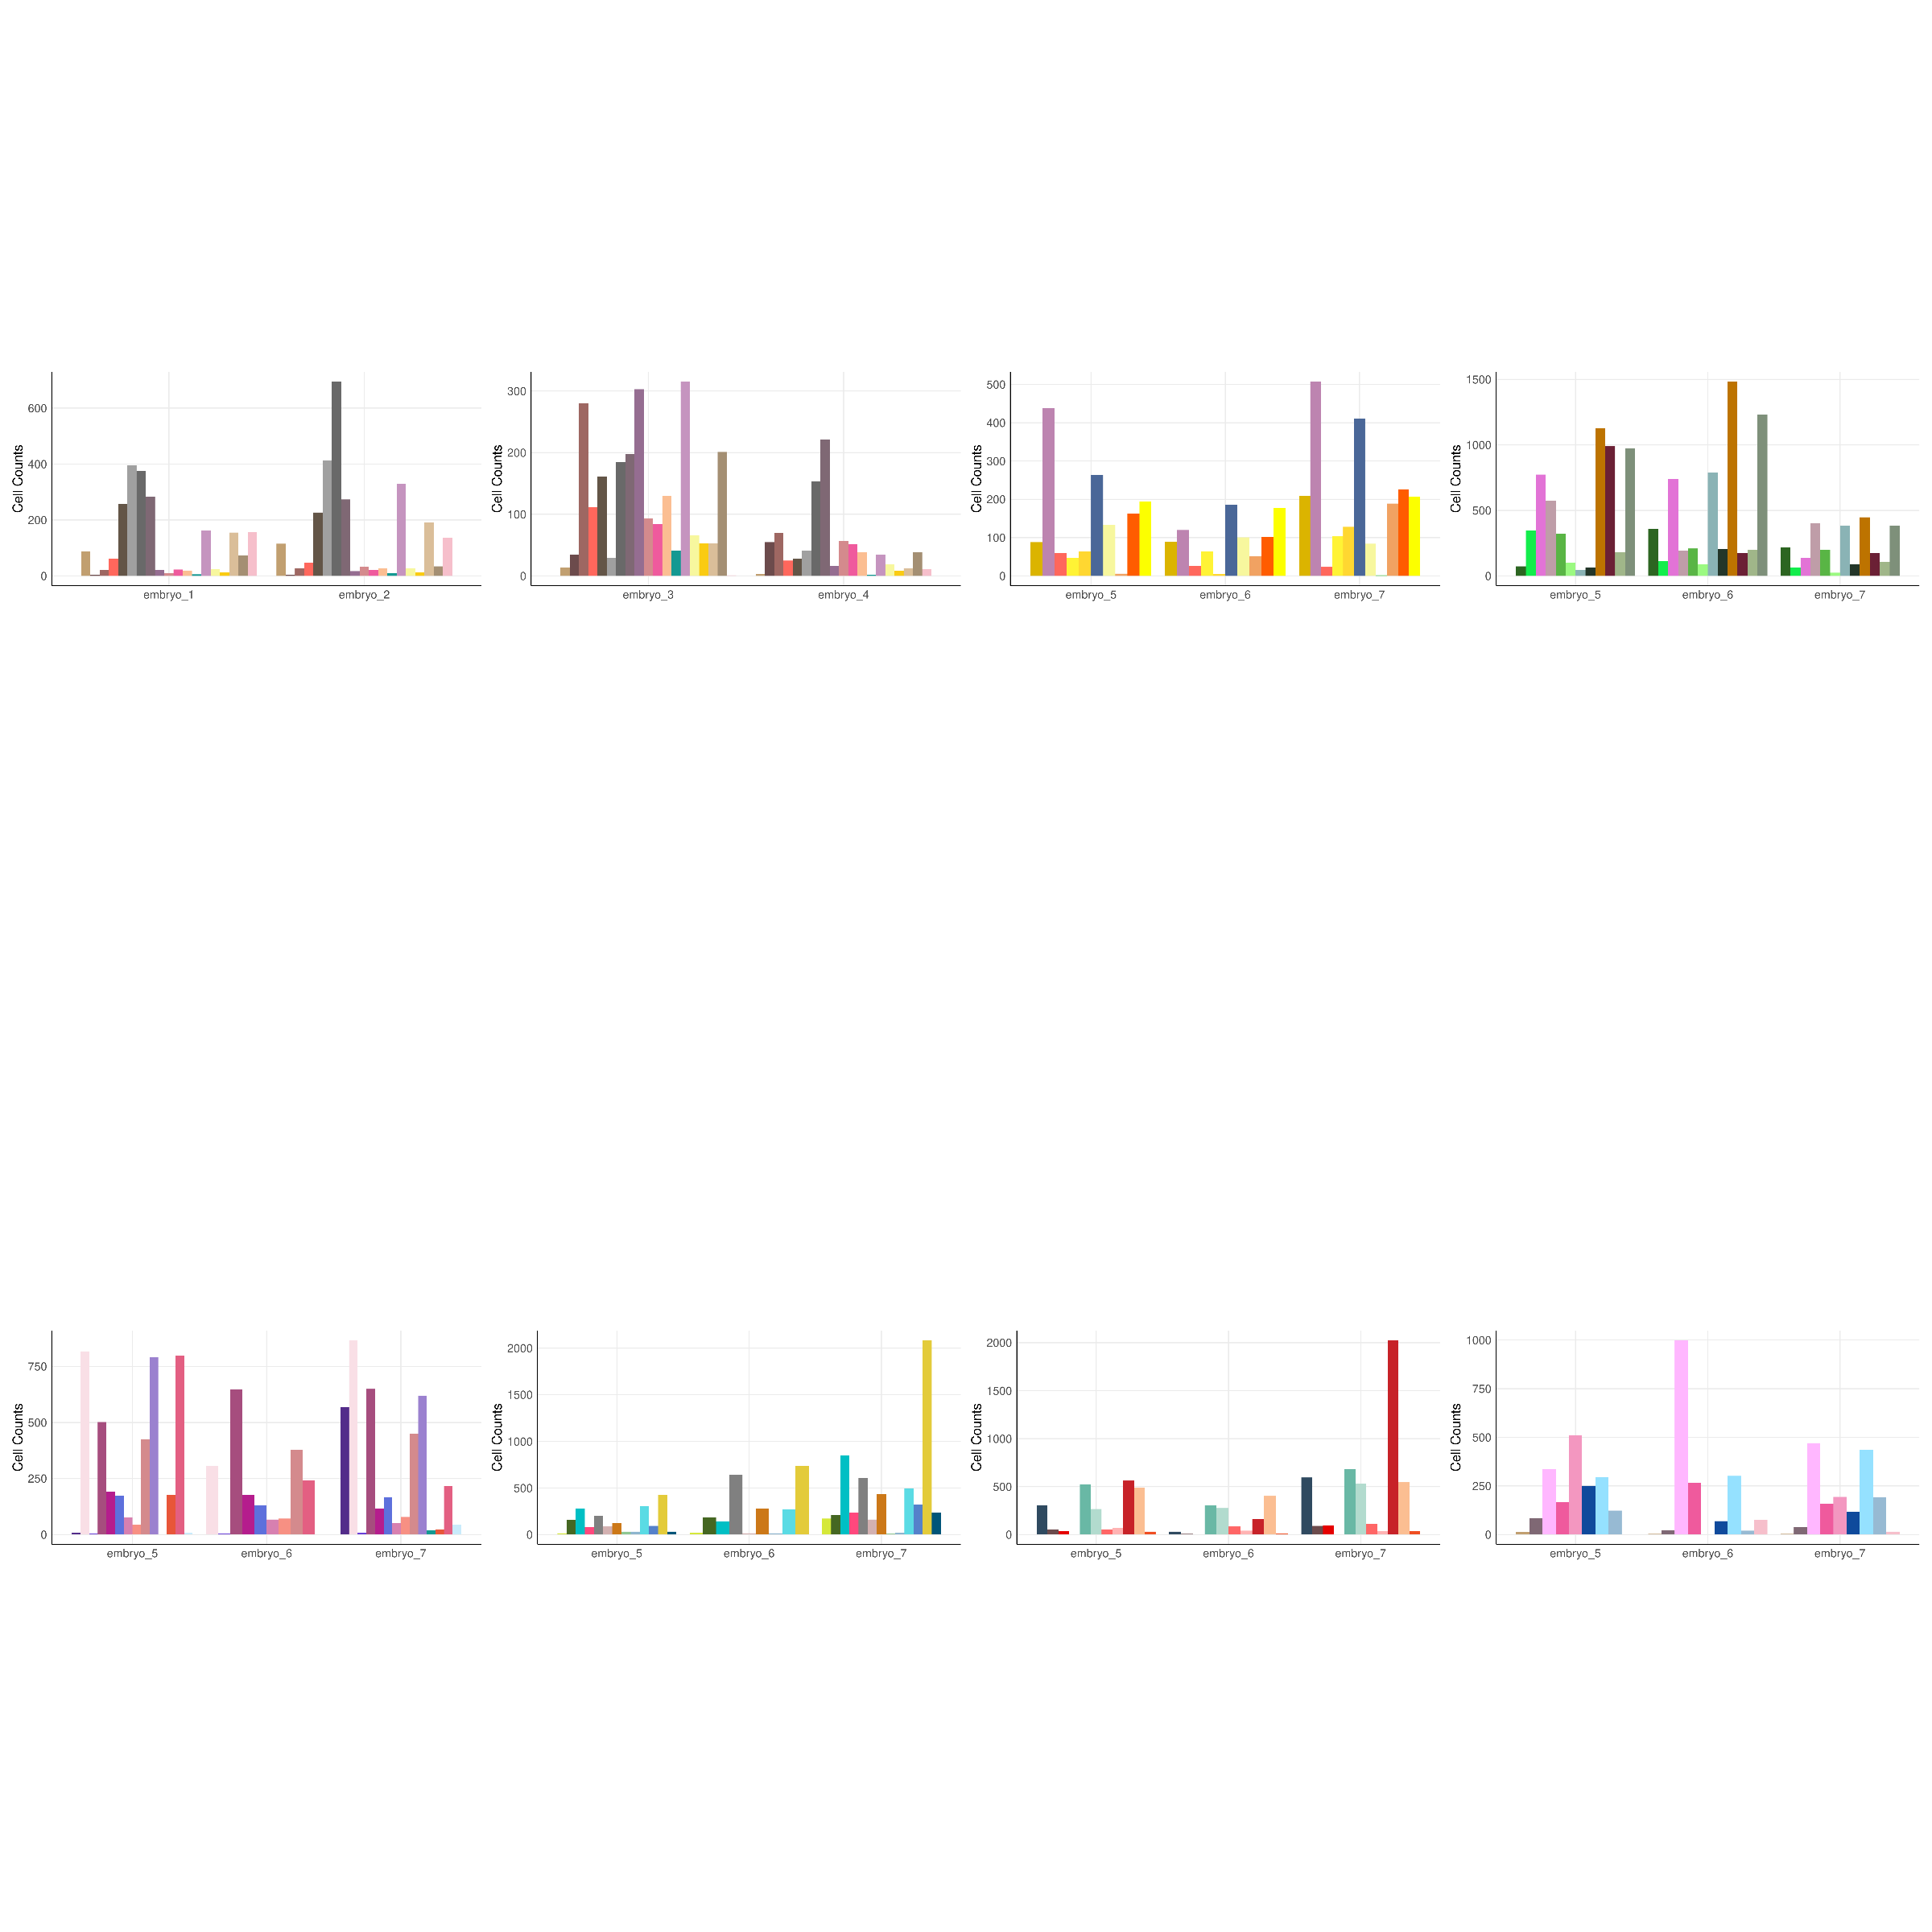

In [18]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 3.5, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
p5_raster <- rasterize_plot(p5)
p6_raster <- rasterize_plot(p6)
p7_raster <- rasterize_plot(p7)
p8_raster <- rasterize_plot(p8)

# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,
p5, p6, p7, p8,
  ncol = 4, nrow = 2) +
  plot_layout(
    widths = c(1, 1),
    heights = c(1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/GITHUB_UPLOAD_FOLDER/6_figure_generation/sfig_3/output/seqFISH_cell_counts.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = ((200/4)*1/5))
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

## Print out Package Versions

In [19]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] png_0.1-8                   Cairo_1.6-0                
 [3] gridExtra_2.3               ragg_1.2.2                 
 [5] viridis_0.6.2               viridisLite_0.4.1          
 [7] cowplot_1.1.1               ggpubr_0.4.0               
 [9] batchelor_1.12.3            pheatmap_1.0.12            
[11] plotly_4.10.0 